### Hyperparametros

In [268]:
import ast

results = open("./../models/Fast_RCNN_R50/results.txt", "r")
#results = open("./../models/results.txt", "r")
results = results.readlines()
count = 0
results_dict = {}
for line in results:
    line = line.strip("\n")
    line_by_spaces = line.split(" ")
    if line_by_spaces[0] == "Batch":
        line_by_comas = line.split(",")
        settings = {}
        for item in line_by_comas:
            setting = item.strip(" ").split(":")
            settings[setting[0]] = float(setting[1].strip(" ")) 
        results_dict[count] = settings
    if line_by_spaces[0] == "Mean":
        results = line.strip("Mean performance of 5 folds:")
        results = ast.literal_eval(results)
        combined_results = {}
        for key in results:
            for value in results[key]:
                new_key = key + "_" + value
                combined_results[new_key] = results[key][value]
        results_dict[count] = results_dict[count] | combined_results
        count += 1

print(results_dict)

{0: {'Batch size': 2.0, 'Learning rate': 0.001, 'Batch size per image': 64.0, 'bbox_AP': 6.9807808979049835, 'bbox_AP50': 11.868769454410875, 'bbox_AP75': 7.72875520032247, 'bbox_APs': 7.377988827904494, 'bbox_APm': 9.078417403725513, 'bbox_APl': 12.011808010709444, 'bbox_AP-dark': 5.20887670274747, 'bbox_AP-light': 8.752685093062496, 'segm_AP': 2.284272126928159, 'segm_AP50': 7.832799319194043, 'segm_AP75': 0.45816440583650914, 'segm_APs': 1.819532716247044, 'segm_APm': 16.985378920632332, 'segm_APl': 4.319526952695268, 'segm_AP-dark': 2.021599151890119, 'segm_AP-light': 2.546945101966198}, 1: {'Batch size': 2.0, 'Learning rate': 0.001, 'Batch size per image': 128.0, 'bbox_AP': 8.634869863199302, 'bbox_AP50': 13.293690031622063, 'bbox_AP75': 10.16334292565567, 'bbox_APs': 8.92224855015143, 'bbox_APm': 10.747758121356979, 'bbox_APl': 13.40880991535062, 'bbox_AP-dark': 7.171255956836203, 'bbox_AP-light': 10.098483769562401, 'segm_AP': 2.9264125166589645, 'segm_AP50': 8.992628899633468, 

In [269]:
import pandas as pd

df = pd.DataFrame.from_dict(results_dict, orient='index')
df.head()

,Batch size,Learning rate,Batch size per image,bbox_AP,bbox_AP50,bbox_AP75,bbox_APs,bbox_APm,bbox_APl,bbox_AP-dark,bbox_AP-light,segm_AP,segm_AP50,segm_AP75,segm_APs,segm_APm,segm_APl,segm_AP-dark,segm_AP-light
0,2.0,0.0010,64.0,6.980781,11.868769,7.728755,7.377989,9.078417,12.011808,5.208877,8.752685,2.284272,7.832799,0.458164,1.819533,16.985379,4.319527,2.021599,2.546945
1,2.0,0.0010,128.0,8.634870,13.293690,10.163343,8.922249,10.747758,13.408810,7.171256,10.098484,2.926413,8.992629,0.595275,1.998273,16.500894,5.947030,2.556020,3.296805
2,2.0,0.0010,256.0,9.298117,13.923882,10.758355,8.941805,13.504626,13.763830,8.032503,10.563731,3.285799,10.334963,0.813432,2.183651,16.354310,6.434743,3.073200,3.498398
3,2.0,0.0010,512.0,6.881601,10.336258,7.473847,6.763451,9.472617,11.511264,4.546544,9.216658,2.318847,6.956063,0.696015,1.316803,18.652966,6.766557,1.679336,2.958357
4,2.0,0.0001,64.0,5.863682,9.847576,6.047921,5.533947,8.647506,7.259573,3.463371,8.263992,1.577873,5.225722,0.272877,1.059703,13.106490,1.760635,0.816952,2.338793


In [270]:
df_sorted = df.sort_values(by=['bbox_AP','segm_AP'], ascending=False)
df_sorted.head()

,Batch size,Learning rate,Batch size per image,bbox_AP,bbox_AP50,bbox_AP75,bbox_APs,bbox_APm,bbox_APl,bbox_AP-dark,bbox_AP-light,segm_AP,segm_AP50,segm_AP75,segm_APs,segm_APm,segm_APl,segm_AP-dark,segm_AP-light
49,10.0,0.001,128.0,10.836327,15.401072,12.237261,10.055775,13.721033,16.103348,9.826027,11.846627,3.907506,10.603062,1.801154,3.424632,21.358359,6.907591,3.916477,3.898535
38,8.0,0.001,256.0,10.238143,14.640276,11.636960,10.280377,13.253589,16.100526,8.665789,11.810498,3.652058,10.310902,1.339706,2.231816,22.395318,5.877888,3.016289,4.287827
50,10.0,0.001,256.0,10.177159,14.762258,11.715184,9.834187,13.122162,15.210139,9.110928,11.243389,3.539579,10.057012,1.098074,2.395174,22.457839,6.836634,3.195094,3.884064
48,10.0,0.001,64.0,10.069569,14.569697,11.452023,9.776804,12.634998,16.770460,8.924474,11.214663,3.548093,10.169025,0.995762,2.826260,21.068299,6.282885,3.489007,3.607179
26,6.0,0.001,256.0,9.974337,14.570267,11.713180,9.612261,13.613043,16.743252,8.649182,11.299491,3.564611,10.451672,0.992449,2.347018,20.408957,7.242574,3.071767,4.057454


In [271]:
reduces_df = df[['Batch size', 'Learning rate', 'Batch size per image','bbox_AP', 'segm_AP']]
reduces_df.head()

,Batch size,Learning rate,Batch size per image,bbox_AP,segm_AP
0,2.0,0.0010,64.0,6.980781,2.284272
1,2.0,0.0010,128.0,8.634870,2.926413
2,2.0,0.0010,256.0,9.298117,3.285799
3,2.0,0.0010,512.0,6.881601,2.318847
4,2.0,0.0001,64.0,5.863682,1.577873


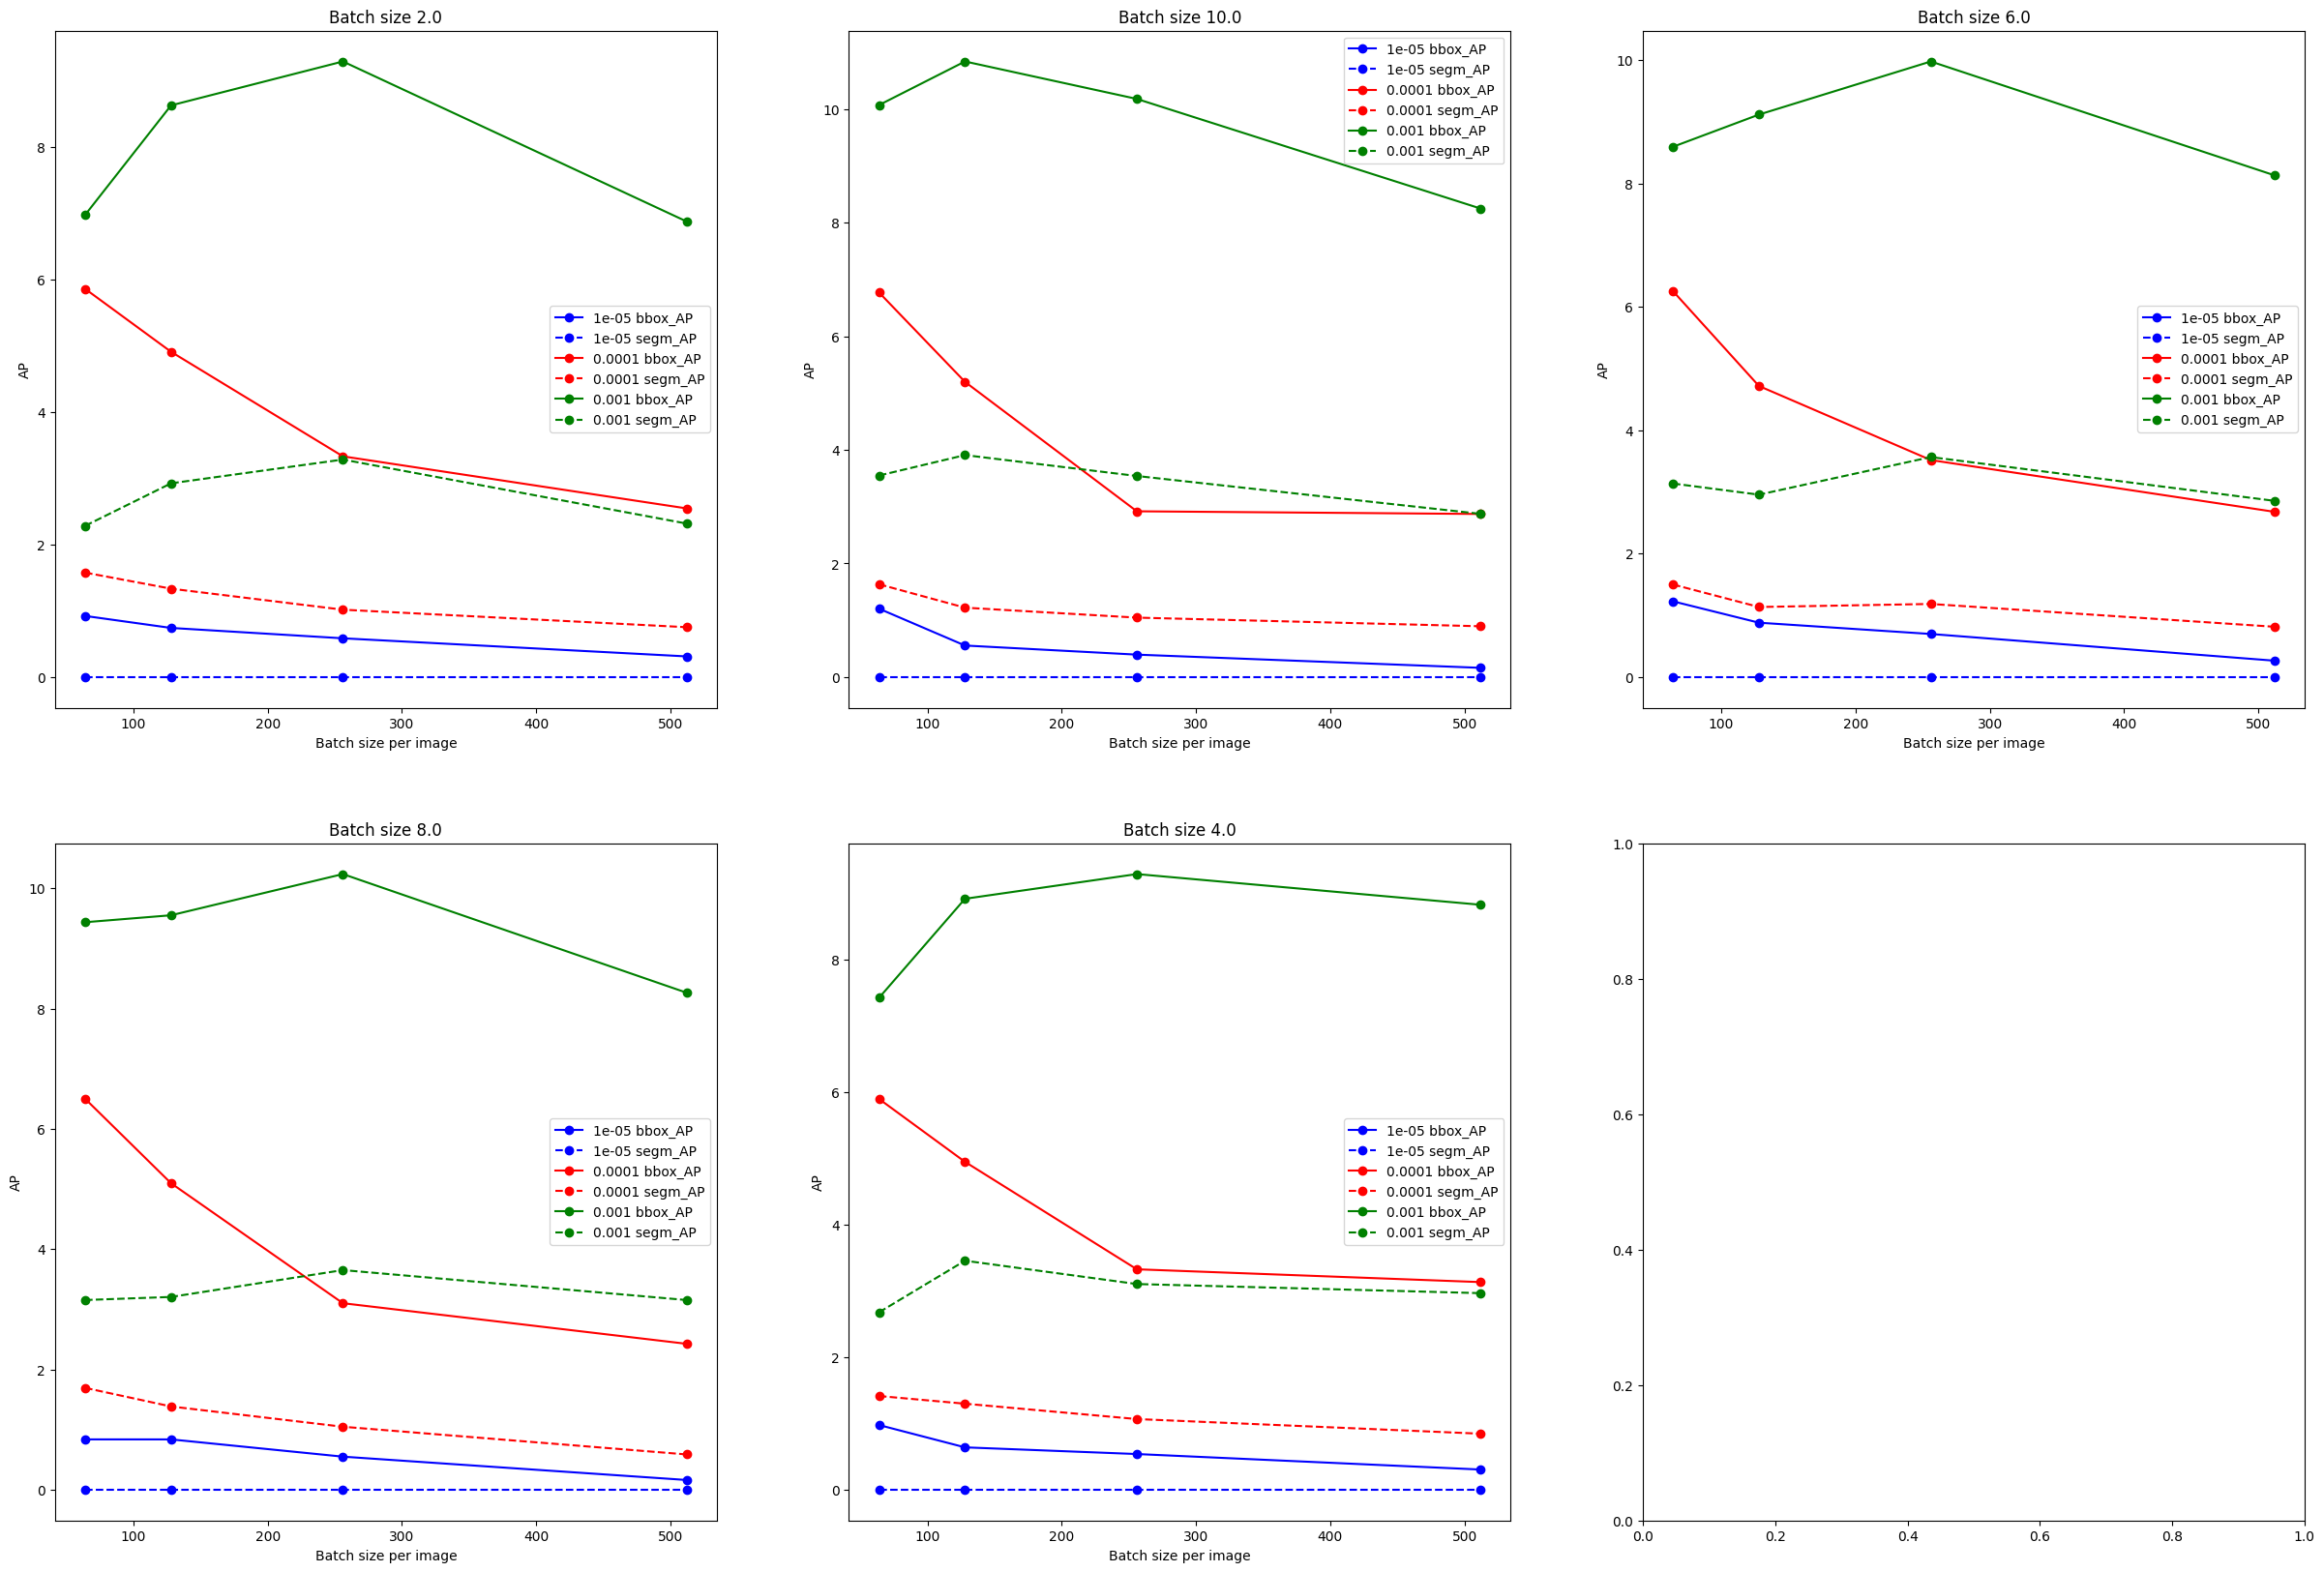

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped_bs = reduces_df.groupby('Batch size')

fig, ax = plt.subplots(2,3, figsize=(30, 20))

# Define line styles
line_styles = ['-', '--']
labels = ['bbox_AP', 'segm_AP']
colors = ['blue', 'red', 'green']

for i,(key, group) in enumerate(grouped_bs):
    if key in [2.0, 4.0, 6.0, 8.0, 10.0]:
        grouped_lr = group.groupby('Learning rate')
        for j,(key_lr, group_lr) in enumerate(grouped_lr):
            for k, metric in enumerate([group_lr['bbox_AP'], group_lr['segm_AP']]):
                ax[i%2][i%3].plot(group_lr['Batch size per image'], metric, marker='o', linestyle=line_styles[k], label=f'{key_lr} {labels[k]}', color=colors[j])
        ax[i%2][i%3].legend()
        ax[i%2][i%3].set_title(f'Batch size {key}')
        ax[i%2][i%3].set_xlabel('Batch size per image')
        ax[i%2][i%3].set_ylabel('AP')

plt.show()



### Folds

In [273]:
import re

def get_results(data):
    keys = ["bbox_AP", "segm_AP"]
    results = {}
    matches = re.findall(r'{.*?}', data)
    for i,match in enumerate(matches):
        match = ast.literal_eval(match)
        results[keys[i]] = match
    return results

In [274]:
results = open("./../models/Fast_RCNN_R50/results.txt", "r")
#results = open("./../models/results.txt", "r")
results = results.readlines()
count = 0
data_dict = {}

for i, line in enumerate(results):
    line = line.strip("\n")
    if line == str(count):
        data_list = results[i+3:i+8]
        data_len = len(data_list)
        data = [d.split("OrderedDict")[1] for d in data_list]
        results_to_dict = [get_results(d) for d in data]
        fold_dict = {}
        for i, r in enumerate(results_to_dict):
            fold_dict[i] = r
        data_dict[count] = fold_dict
        count += 1

print(data_dict)

{0: {0: {'bbox_AP': {'AP': 5.5919116144515195, 'AP50': 10.313265549339514, 'AP75': 6.523037041974468, 'APs': 4.380451299458231, 'APm': 7.015467681156018, 'APl': 13.206282992770799, 'AP-dark': 2.7539178784394465, 'AP-light': 8.429905350463592}, 'segm_AP': {'AP': 1.1673431292485053, 'AP50': 4.759985485981561, 'AP75': 0.13673488641896453, 'APs': 0.8516910761130484, 'APm': 19.896273054670004, 'APl': 0.34653465346534645, 'AP-dark': 1.3124825334727905, 'AP-light': 1.02220372502422}}, 1: {'bbox_AP': {'AP': 7.28071527726369, 'AP50': 11.997044525177875, 'AP75': 7.541373966481693, 'APs': 7.77148529804338, 'APm': 11.224987280473284, 'APl': 10.06699254963484, 'AP-dark': 7.669303371449001, 'AP-light': 6.892127183078377}, 'segm_AP': {'AP': 2.727889778889432, 'AP50': 8.526030708713197, 'AP75': 1.1691507874191214, 'APs': 2.177533369309651, 'APm': 14.754690840192128, 'APl': 3.0346534653465347, 'AP-dark': 2.4665774208336986, 'AP-light': 2.989202136945164}}, 2: {'bbox_AP': {'AP': 7.033883825012281, 'AP50

In [275]:
data_dict_unified = {}
for count in data_dict:
    for fold in data_dict[count]:
        for value in data_dict[count][fold]:
            for metric in data_dict[count][fold][value]:
                new_key = value + "_" + metric
                if count not in data_dict_unified:
                    data_dict_unified[count] = {}
                if fold not in data_dict_unified[count]:
                    data_dict_unified[count][fold] = {}
                data_dict_unified[count][fold][new_key] = data_dict[count][fold][value][metric]

print(data_dict_unified)

{0: {0: {'bbox_AP_AP': 5.5919116144515195, 'bbox_AP_AP50': 10.313265549339514, 'bbox_AP_AP75': 6.523037041974468, 'bbox_AP_APs': 4.380451299458231, 'bbox_AP_APm': 7.015467681156018, 'bbox_AP_APl': 13.206282992770799, 'bbox_AP_AP-dark': 2.7539178784394465, 'bbox_AP_AP-light': 8.429905350463592, 'segm_AP_AP': 1.1673431292485053, 'segm_AP_AP50': 4.759985485981561, 'segm_AP_AP75': 0.13673488641896453, 'segm_AP_APs': 0.8516910761130484, 'segm_AP_APm': 19.896273054670004, 'segm_AP_APl': 0.34653465346534645, 'segm_AP_AP-dark': 1.3124825334727905, 'segm_AP_AP-light': 1.02220372502422}, 1: {'bbox_AP_AP': 7.28071527726369, 'bbox_AP_AP50': 11.997044525177875, 'bbox_AP_AP75': 7.541373966481693, 'bbox_AP_APs': 7.77148529804338, 'bbox_AP_APm': 11.224987280473284, 'bbox_AP_APl': 10.06699254963484, 'bbox_AP_AP-dark': 7.669303371449001, 'bbox_AP_AP-light': 6.892127183078377, 'segm_AP_AP': 2.727889778889432, 'segm_AP_AP50': 8.526030708713197, 'segm_AP_AP75': 1.1691507874191214, 'segm_AP_APs': 2.17753336

In [276]:
data_df = pd.concat({(i,j): pd.DataFrame(data_dict_unified[i][j], index=[0]) for i in data_dict_unified.keys() 
                for j in data_dict_unified[i].keys()}, axis=0)

# Reset the index
data_df.reset_index(inplace=True)

# Rename the columns
data_df.columns = ['OuterKey', 'InnerKey'] + list(data_df.columns[2:])
data_df = data_df.drop(columns=["level_2"])

# Print the DataFrame
data_df.head()

,OuterKey,InnerKey,bbox_AP_AP,bbox_AP_AP50,bbox_AP_AP75,bbox_AP_APs,bbox_AP_APm,bbox_AP_APl,bbox_AP_AP-dark,bbox_AP_AP-light,segm_AP_AP,segm_AP_AP50,segm_AP_AP75,segm_AP_APs,segm_AP_APm,segm_AP_APl,segm_AP_AP-dark,segm_AP_AP-light
0,0,0,5.591912,10.313266,6.523037,4.380451,7.015468,13.206283,2.753918,8.429905,1.167343,4.759985,0.136735,0.851691,19.896273,0.346535,1.312483,1.022204
1,0,1,7.280715,11.997045,7.541374,7.771485,11.224987,10.066993,7.669303,6.892127,2.727890,8.526031,1.169151,2.177533,14.754691,3.034653,2.466577,2.989202
2,0,2,7.033884,11.837920,7.337647,6.017092,7.001896,23.292033,4.520868,9.546899,2.378872,7.970939,0.241498,1.773263,16.438405,8.803630,1.659600,3.098143
3,0,3,8.861588,14.881409,9.978196,12.211341,10.857349,9.363765,6.495115,11.228061,3.290615,10.072658,0.670766,3.094885,18.157370,6.514026,3.343000,3.238231
4,0,4,6.135806,10.314208,7.263522,6.509574,9.292387,4.129967,4.605179,7.666432,1.856641,7.834384,0.072673,1.200292,15.680156,2.898790,1.326335,2.386946


In [277]:
data_df_bbox = data_df[['OuterKey', 'bbox_AP_AP']]
data_df_segm = data_df[['OuterKey', 'segm_AP_AP']]

In [278]:
grouped_data_bbox_df = data_df_bbox.groupby('OuterKey').describe()
grouped_data_segm_df = data_df_segm.groupby('OuterKey').describe()
grouped_data_bbox_df.head()


bbox_AP_AP                                                    \
              count      mean       std       min       25%       50%   
OuterKey                                                                
0               5.0  6.980781  1.252314  5.591912  6.135806  7.033884   
1               5.0  8.634870  1.519559  7.524564  7.601979  7.873111   
2               5.0  9.298117  1.809666  7.439970  8.394946  9.128211   
3               5.0  6.881601  0.911931  5.646898  6.305493  6.986565   
4               5.0  5.863682  0.989913  4.851425  4.852186  5.958952   

                               
               75%        max  
OuterKey                       
0         7.280715   8.861588  
1         9.053679  11.121016  
2         9.262693  12.264766  
3         7.689176   7.779871  
4         6.787154   6.868692

In [279]:
grouped_data_segm_df.head()

segm_AP_AP                                                    \
              count      mean       std       min       25%       50%   
OuterKey                                                                
0               5.0  2.284272  0.813768  1.167343  1.856641  2.378872   
1               5.0  2.926413  0.971810  2.070217  2.535489  2.639971   
2               5.0  3.285799  1.112225  1.774311  2.602790  3.398075   
3               5.0  2.318847  0.514851  1.815244  2.041576  2.117670   
4               5.0  1.577873  0.557413  1.020691  1.022883  1.608711   

                              
               75%       max  
OuterKey                      
0         2.727890  3.290615  
1         2.789363  4.597022  
2         4.235655  4.418164  
3         2.488072  3.131671  
4         1.979288  2.257791

Text(0, 0.5, 'Value')

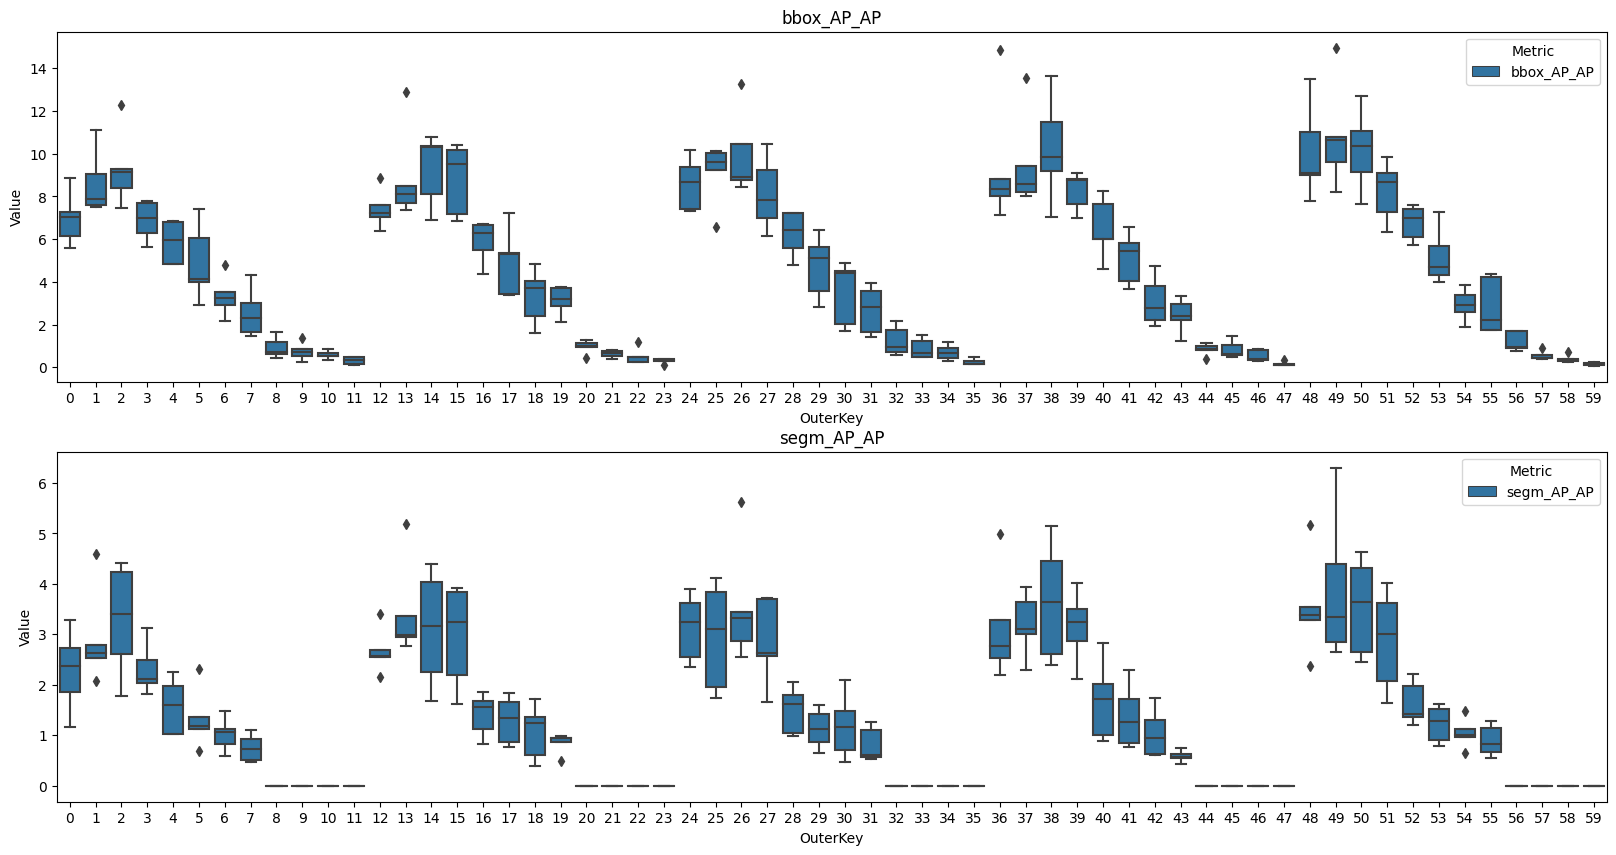

In [280]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))

melted_bbox_df = data_df_bbox.melt(id_vars=['OuterKey'], var_name='Metric', value_name='Value')
sns.boxplot(x='OuterKey', y='Value', data=melted_bbox_df, hue='Metric', ax=ax[0])
ax[0].set_title('bbox_AP_AP')
ax[0].set_xlabel('OuterKey')
ax[0].set_ylabel('Value')

melted_segm_df = data_df_segm.melt(id_vars=['OuterKey'], var_name='Metric', value_name='Value')
sns.boxplot(x='OuterKey', y='Value', data=melted_segm_df, hue='Metric', ax=ax[1])
ax[1].set_title('segm_AP_AP')
ax[1].set_xlabel('OuterKey')
ax[1].set_ylabel('Value')

In [281]:
# Save a new df for sections of 12 rows of oute key of grouped_data_bbox_df
grouped_data_0_11 = grouped_data_bbox_df[0:12]
grouped_data_12_23 = grouped_data_bbox_df[12:24]
grouped_data_24_35 = grouped_data_bbox_df[24:36]
grouped_data_36_47 = grouped_data_bbox_df[36:48]
grouped_data_48_59 = grouped_data_bbox_df[48:60]
print(grouped_data_0_11.shape, grouped_data_24_35.shape, grouped_data_36_47.shape, grouped_data_48_59.shape)
grouped_data_0_11.head()

(12, 8) (12, 8) (12, 8) (12, 8)


bbox_AP_AP                                                    \
              count      mean       std       min       25%       50%   
OuterKey                                                                
0               5.0  6.980781  1.252314  5.591912  6.135806  7.033884   
1               5.0  8.634870  1.519559  7.524564  7.601979  7.873111   
2               5.0  9.298117  1.809666  7.439970  8.394946  9.128211   
3               5.0  6.881601  0.911931  5.646898  6.305493  6.986565   
4               5.0  5.863682  0.989913  4.851425  4.852186  5.958952   

                               
               75%        max  
OuterKey                       
0         7.280715   8.861588  
1         9.053679  11.121016  
2         9.262693  12.264766  
3         7.689176   7.779871  
4         6.787154   6.868692

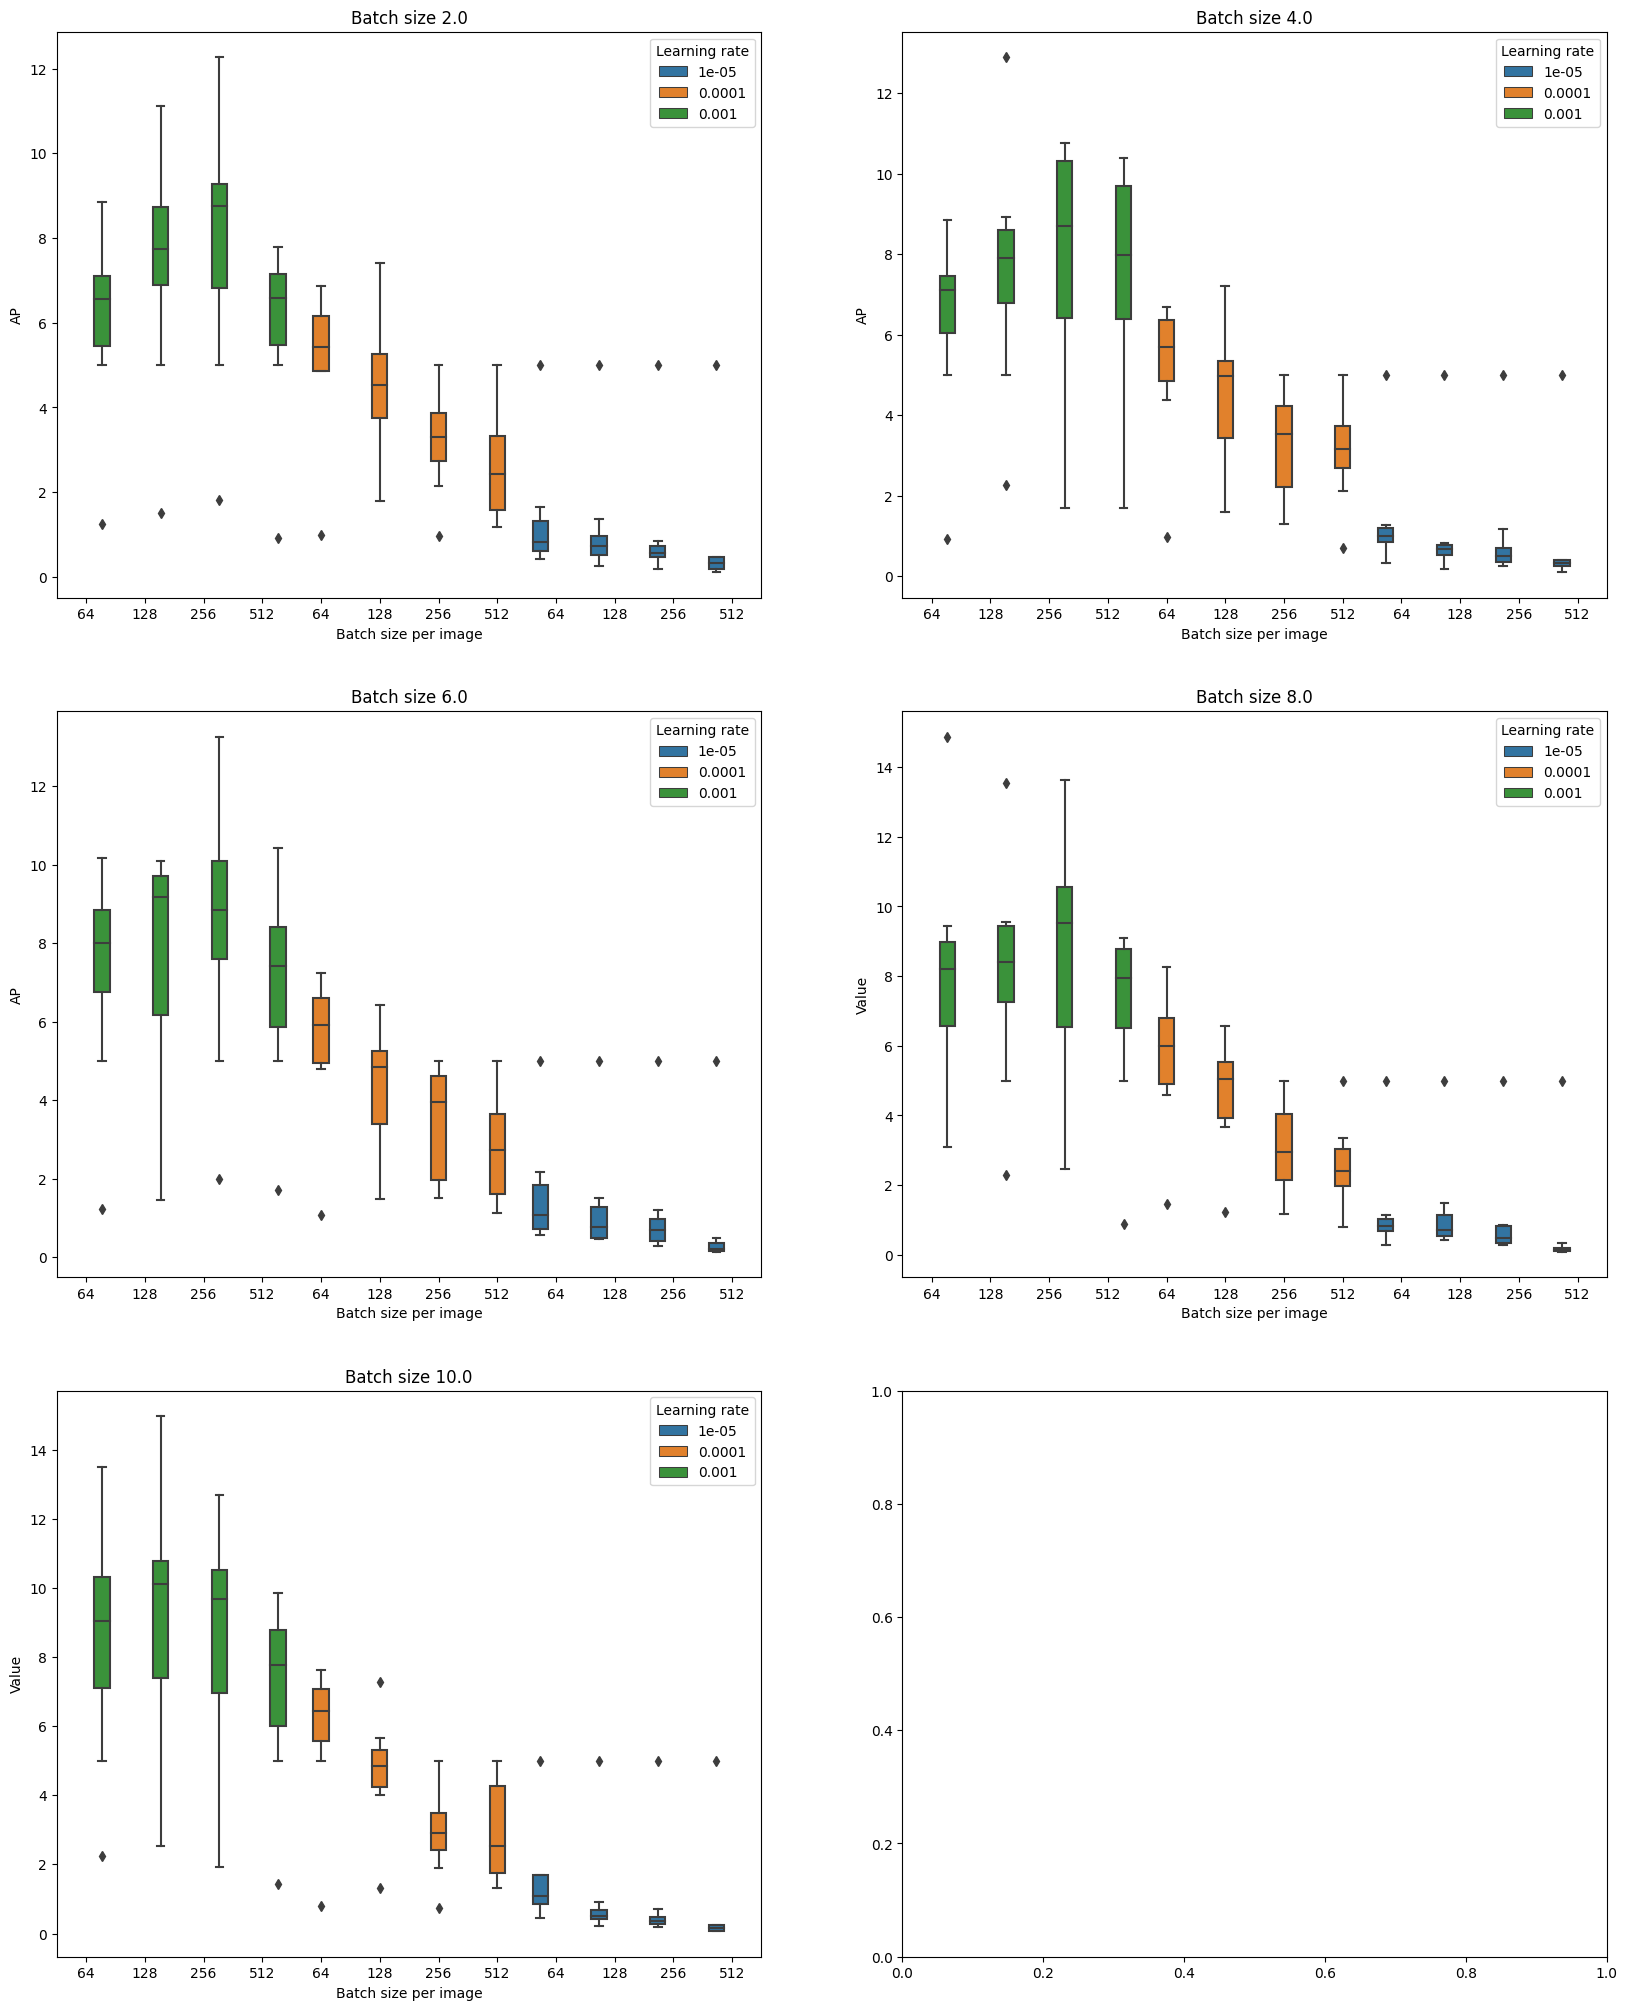

In [283]:
x_value = [64,128,256,512]*3
x_values_df = pd.DataFrame(x_value, columns=['Batch size per image'])

hue_labels = [0.001, 0.001, 0.001, 0.001, 0.0001, 0.0001, 0.0001, 0.0001, 0.00001, 0.00001, 0.00001, 0.00001]

fig, ax = plt.subplots(3, 2, figsize=(20, 25))

melt_bbox_0_11 = grouped_data_0_11.reset_index().melt(id_vars=['OuterKey'], var_name='Metric', value_name='Value')
melt_bbox_0_11['Learning rate'] = melt_bbox_0_11['OuterKey'].map(dict(enumerate(hue_labels)))
sns.boxplot(x='OuterKey', y='Value', data=melt_bbox_0_11, hue='Learning rate', ax=ax[0][0])
ax[0][0].set_xticklabels(x_values_df['Batch size per image'])
ax[0][0].set_xlabel('Batch size per image')
ax[0][0].set_ylabel('AP')
ax[0][0].set_title('Batch size 2.0')

melt_bbox_12_23 = grouped_data_12_23.reset_index().melt(id_vars=['OuterKey'], var_name='Metric', value_name='Value')
melt_bbox_12_23['Learning rate'] = melt_bbox_12_23['OuterKey'].map(dict(enumerate(hue_labels, start=12)))
sns.boxplot(x='OuterKey', y='Value', data=melt_bbox_12_23, hue='Learning rate', ax=ax[0][1])
ax[0][1].set_title('Batch size 4.0')
ax[0][1].set_xticklabels(x_values_df['Batch size per image'])
ax[0][1].set_xlabel('Batch size per image')
ax[0][1].set_ylabel('AP')

melt_bbox_24_35 = grouped_data_24_35.reset_index().melt(id_vars=['OuterKey'], var_name='Metric', value_name='Value')
melt_bbox_24_35['Learning rate'] = melt_bbox_24_35['OuterKey'].map(dict(enumerate(hue_labels,start=24)))
sns.boxplot(x='OuterKey', y='Value', data=melt_bbox_24_35, hue='Learning rate', ax=ax[1][0])
ax[1][0].set_title('Batch size 6.0')
ax[1][0].set_xticklabels(x_values_df['Batch size per image'])
ax[1][0].set_xlabel('Batch size per image')
ax[1][0].set_ylabel('AP')

melt_bbox_36_47 = grouped_data_36_47.reset_index().melt(id_vars=['OuterKey'], var_name='Metric', value_name='Value')
melt_bbox_36_47['Learning rate'] = melt_bbox_36_47['OuterKey'].map(dict(enumerate(hue_labels, start=36)))
sns.boxplot(x='OuterKey', y='Value', data=melt_bbox_36_47, hue='Learning rate', ax=ax[1][1])
ax[1][1].set_title('Batch size 8.0')
ax[1][1].set_xticklabels(x_values_df['Batch size per image'])
ax[1][1].set_xlabel('Batch size per image')

melt_bbox_48_59 = grouped_data_48_59.reset_index().melt(id_vars=['OuterKey'], var_name='Metric', value_name='Value')
melt_bbox_48_59['Learning rate'] = melt_bbox_48_59['OuterKey'].map(dict(enumerate(hue_labels, start=48)))
sns.boxplot(x='OuterKey', y='Value', data=melt_bbox_48_59, hue='Learning rate', ax=ax[2][0])
ax[2][0].set_title('Batch size 10.0')
ax[2][0].set_xticklabels(x_values_df['Batch size per image'])
ax[2][0].set_xlabel('Batch size per image')

plt.show()
